# Problem 3: MNIST multi class logistic regression
# Problem 4: Revisting Logistic Regression and MNIST

In [2]:
%%time

#Problem 3: Part 1: Use the fetch openml command from sklearn.datasets to import the MNIST data set,
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

CPU times: user 10.7 s, sys: 312 ms, total: 11 s
Wall time: 1min 2s


In [3]:
X.shape[0]

70000

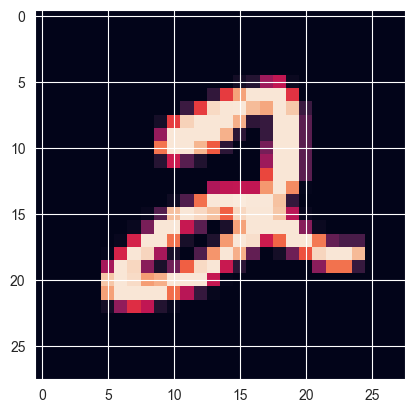

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

X_df = pd.DataFrame(X)
temp=X_df.iloc[5,:].values
temp = temp.reshape(28,28).astype('uint8')
plt.imshow(temp)

In [5]:
#Problem 3: Part 2: Choose a reasonable train-test split,
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000
)

In [6]:
#Problem 3: Part 2: run multi class logistic regression

from sklearn.linear_model import LogisticRegression
mnist_lgr = LogisticRegression(C=3, multi_class='multinomial', penalty="l2", solver="saga", tol=0.1, max_iter=1000)
mnist_lgr.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.1)

In [7]:
#y_pred for score calculation
y_pred = mnist_lgr.predict(X_test)

In [8]:
#Problem 3: Part 3: training and test loss from above
from sklearn.metrics import accuracy_score

score = (accuracy_score(y_test,y_pred))*100
print("Accuracy score is %.2f%%"% score)

sparsity = np.mean(mnist_lgr.coef_ == 0) * 100
print("Sparsity value for L2 is %.2f%%"% sparsity)

Accuracy score is 92.61%
Sparsity value for L2 is 8.67%


Text(0.5, 0.98, 'Classification vector for...')

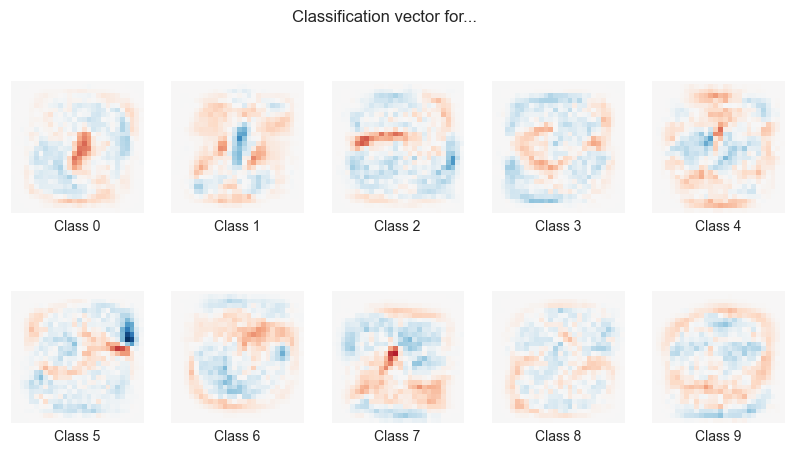

In [9]:
#Problem 3: Part 5: Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimen- sion as the data. Therefore we#
# can pretend that
# the coefficients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the
# 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying
import matplotlib.pyplot as plt

coef = mnist_lgr.coef_.copy()

plt.figure(figsize=(10, 5))

scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

In [10]:
#Problem 3: part 2: Cross entropy loss

from sklearn.metrics import log_loss

cross_entropy_loss = log_loss(y_test, mnist_lgr.predict_proba(X_test))
print("Logistic regression cross entropy loss: ",cross_entropy_loss)


Logistic regression cross entropy loss:  0.2686619107813208


In [11]:
#Problem 3: part 4: Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as
#good accuracy

mnist_lgr_l1 = LogisticRegression(C=3, multi_class='multinomial', penalty="l1", solver="saga", tol=0.1)
mnist_lgr_l1.fit(X_train, y_train)

y_pred_l1 = mnist_lgr_l1.predict(X_test)

score_l1 = accuracy_score(y_test,y_pred_l1)
print("Accuracy score is ", score_l1)

sparsity_l1 = np.mean(mnist_lgr_l1.coef_ == 0) * 100
print("Sparsity value for L1 is ", sparsity_l1)

Accuracy score is  0.9256
Sparsity value for L1 is  13.494897959183675


In [12]:
#Problem 4: part 1: Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
#Validation to find the best settings.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_mnist = RandomForestClassifier(n_estimators=150)
rf_mnist.fit(X_train,y_train)


RandomForestClassifier(n_estimators=150)

In [13]:
#Cross Validation Score for Random Forest Classifier
pred=rf_mnist.predict(X_test)

score = cross_val_score(rf_mnist, X_train, y_train)
print ("Cross Validation Score for Random Forest Classifier is: ",np.mean(score)*100)

Cross Validation Score for Random Forest Classifier is:  96.8


In [14]:
#Problem 4: part 2: use Gradient Boosting to do the same (we used catboost classifier) and hyperparams for best model

import catboost as ctb


#hyperparameters for best catboost model
cat = ctb.CatBoostClassifier(iterations=1000, 
                 learning_rate=0.03, depth=6, loss_function='MultiClass', 
        early_stopping_rounds= 1000, verbose=0)


cat.fit(X_train, y_train)
    

In [15]:
y_pred = cat.predict(X_test)

In [16]:
#catboost accuracy score
score = (accuracy_score(y_test,y_pred))*100
print("Accuracy score is %.2f%%"% score)

Accuracy score is 96.84%


In [17]:
#cross validation score
cv_results = cross_val_score(cat, X_train, y_train,
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose=0)    


In [18]:
print ("Cross Validation score for CatBoost Classifier: ",np.mean(cv_results)*100)

Cross Validation score for CatBoost Classifier:  95.965
